<a href="https://colab.research.google.com/github/Victor-aseko/int-to-github/blob/main/Copy_of_TaskA0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     92.64
Date:                Sun, 11 Feb 2024   Prob (F-statistic):          2.82e-106
Time:                        18:52:27   Log-Likelihood:                -1203.1
No. Observations:                 404   AIC:                             2432.
Df Residuals:                     391   BIC:                             2484.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.9705      5.555      6.655      0.0

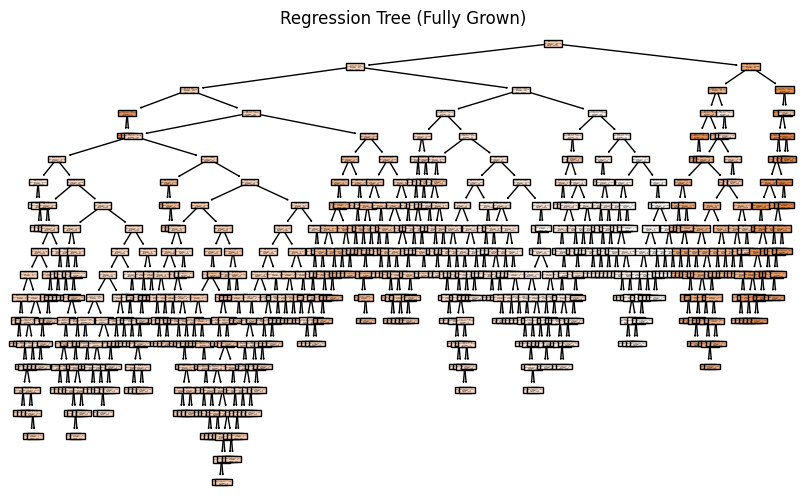

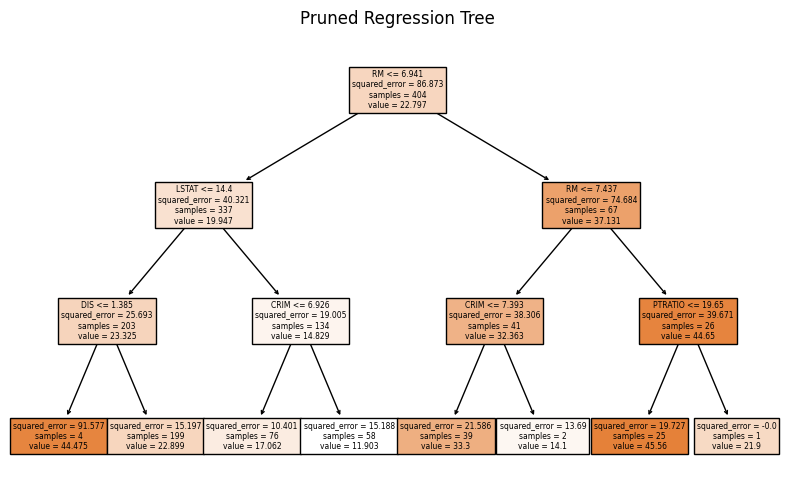

Linear Regression - RMSE: 4.772599769922687 MAE: 3.1113773882381848
Fully Grown Tree - RMSE: 2.996632096465735 MAE: 2.217647058823529
Pruned Tree - RMSE: 3.673046832398878 MAE: 3.0071469760281424
The best model is: Fully Grown Tree
Subset of the dataframe containing Actual, Predicted, and Residual:
     Actual  Predicted  Residual
172    23.1  22.392900  0.707100
82     24.8  25.978689 -1.178689
229    31.5  31.530533 -0.030533
70     24.2  25.885077 -1.685077
204    50.0  42.576231  7.423769
496    19.7  13.513653  6.186347
176    23.2  25.507538 -2.307538
390    15.1  15.838692 -0.738692
218    21.5  24.792839 -3.292839
173    23.6  28.958215 -5.358215


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Task A

# 1. Import the Boston Housing csv file as pandas dataframe
df = pd.read_csv('BostonHousing.csv')

# 2. Ensure correct data types
df['CHAS'] = df['CHAS'].astype('category')

# 3. Remove unnecessary variable
df.drop(columns=['CAT. MEDV'], inplace=True)

# 4. Define features and target variable
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# 5. Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Linear Regression Model using statsmodels.api
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# 6. Linear Regression Model using sklearn
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predictions
y_pred_lr = model_lr.predict(X_val)

# Model evaluation
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
mae_lr = mean_absolute_error(y_val, y_pred_lr)

# 7. Regression Tree
# a. Fully grown tree
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# b. Pruned tree
pruned_tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
pruned_tree_reg.fit(X_train, y_train)

# c. Plot the fully grown tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10,6))
plot_tree(tree_reg, filled=True, feature_names=X.columns)
plt.title("Regression Tree (Fully Grown)")
plt.show()
 #Prunned tree plot
plt.figure(figsize=(10, 6))
plot_tree(pruned_tree_reg, feature_names=X.columns, filled=True)
plt.title("Pruned Regression Tree")
plt.show()

# Model evaluation
#Model Evaluation for fully grown tree
y_pred_tree = tree_reg.predict(X_val)
rmse_tree = np.sqrt(mean_squared_error(y_val, y_pred_tree))
mae_tree = mean_absolute_error(y_val, y_pred_tree)

#Model Evaluation for prunned tree
y_pred_pruned_tree = pruned_tree_reg.predict(X_val)
rmse_pruned_tree = np.sqrt(mean_squared_error(y_val, y_pred_pruned_tree))
mae_pruned_tree = mean_absolute_error(y_val, y_pred_pruned_tree)

# Print results to determine which model is the best

#Linear regression
print("Linear Regression - RMSE:", rmse_lr, "MAE:", mae_lr)

#Fully Grown Tree
print("Fully Grown Tree - RMSE:", rmse_tree, "MAE:", mae_tree)

#Prunned Tree
print("Pruned Tree - RMSE:", rmse_pruned_tree, "MAE:", mae_pruned_tree)

# Best model
best_model = min([
    ("Linear Regression", rmse_lr, mae_lr),
    ("Fully Grown Tree", rmse_tree, mae_tree),
    ("Pruned Tree", rmse_pruned_tree, mae_pruned_tree)
], key=lambda x: (x[1], x[2]))

print("The best model is:", best_model[0])


#Additional info to Generate dataframe and have the screenshot for the report
# Generate dataframe with actual, predicted, and residual values
df_results = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred_lr, 'Residual': y_val - y_pred_lr})

# Take a subset of at least 10 records
df_results_subset = df_results.sample(n=10, random_state=42)

# Print the subset of the dataframe
print("Subset of the dataframe containing Actual, Predicted, and Residual:")
print(df_results_subset)

# Save the screenshot of the dataframe
df_results_subset.to_csv('screenshot_subset.csv', index=False)







